<a href="https://colab.research.google.com/github/raghdiness/breast-cancer-wisconsin/blob/main/SVM_Assignment_Raghda_Haikal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# task 2

Classes: The dataset has two target classes:
Malignant (denoted by 0)
Benign (denoted by 1)

- radius_mean: Mean of distances from the center to points on the perimeter.
- texture_mean: Standard deviation of gray-scale values.
- perimeter_mean: Mean of perimeter values.
- area_mean: Mean of area values.
- smoothness_mean: Mean of local variation in radius lengths.
- compactness_mean: Mean of perimeter^2 / area - 1.0
- concavity_mean: Mean of severity of concave portions of the contour.
- concave points_mean: Mean for the number of concave portions of the contour.
- symmetry_mean: Mean of symmetry.
- fractal_dimension_mean: Mean of the "coastline approximation" - 1.
- radius_se: Standard error for radius.
- texture_se: Standard error for texture.
- perimeter_se: Standard error for perimeter.
- area_se: Standard error for area.
- smoothness_se: Standard error for smoothness.
- compactness_se: Standard error for compactness.
- concavity_se: Standard error for concavity.
- concave points_se: Standard error for concave points.
- symmetry_se: Standard error for symmetry.
- fractal_dimension_se: Standard error for fractal dimension.
- radius_worst: Worst or largest radius value.
- texture_worst: Worst texture value.
- perimeter_worst: Worst perimeter value.
- area_worst: Worst area value.
- smoothness_worst: Worst smoothness value.
- compactness_worst: Worst compactness value.
- concavity_worst: Worst concavity value.
- concave points_worst: Worst concave points value.
- symmetry_worst: Worst symmetry value.
- fractal_dimension_worst: Worst fractal dimension value.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Assign the correct column names based on the dataset documentation
columns = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Load the dataset and assign these column names
data = pd.read_csv(url, header=None, names=columns)
data.drop(columns=['ID'], inplace=True)


In [ ]:
data.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import StandardScaler , LabelEncoder,OneHotEncoder
le=LabelEncoder()


# Make a copy to avoid changing original
df_encoded = data.copy()

# Loop through each column and apply label encoding if not numeric
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(df_encoded.head())

   Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

## Some Visualization to help with choosing the features

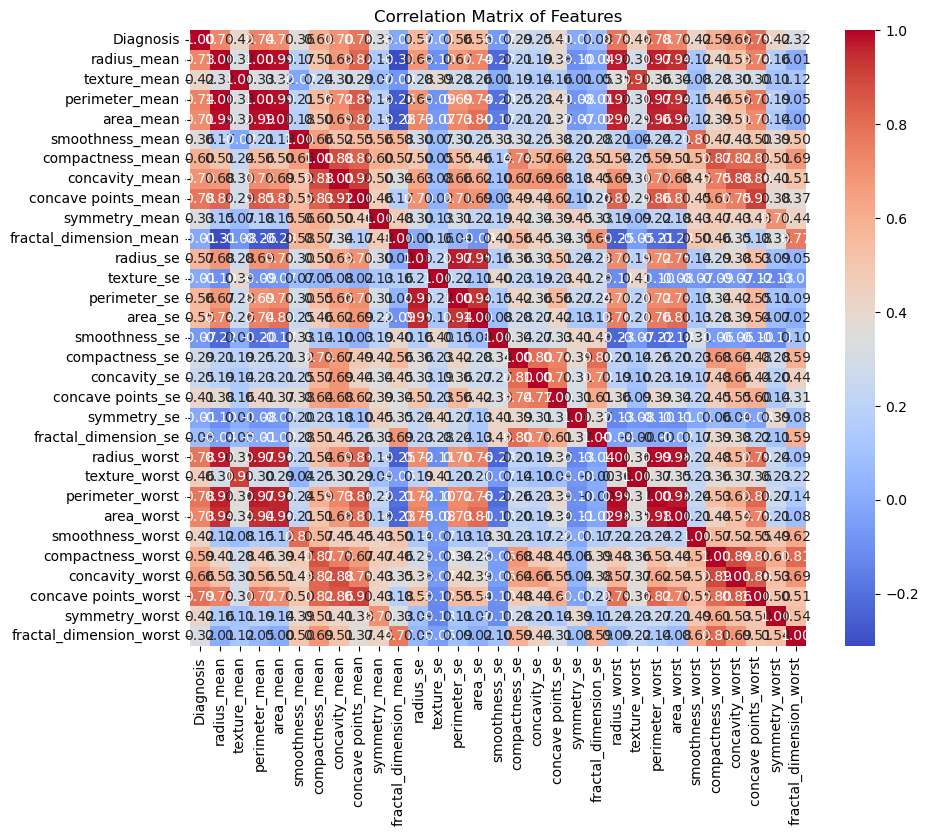

In [ ]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Features")
plt.show()

### focus on perimeter & concavity because they're giving a relatively high correlation

In [ ]:
# sns.pairplot(df_encoded)

## Visualizing distribution of Target


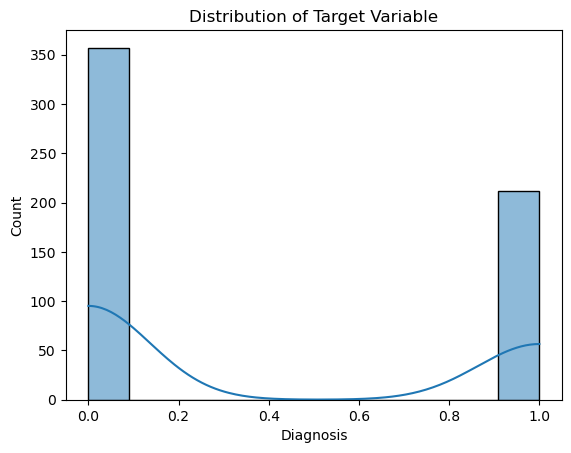

In [ ]:
sns.histplot(data=df_encoded, x='Diagnosis', kde=True)
plt.title('Distribution of Target Variable')
plt.show()

## Setting features to perimeter_mean, perimeter_worst, concavity_mean & concavity_worst
## Setting target to Diagnosis

In [ ]:
features = df_encoded[["perimeter_mean", "perimeter_worst", "concavity_mean", "concavity_worst"]]
target = df_encoded["Diagnosis"]



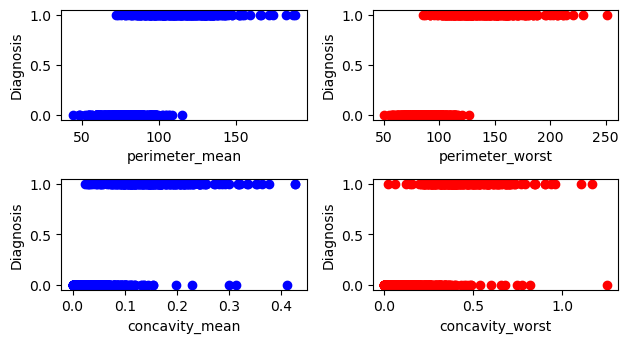

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(3,2,1)
plt.scatter(df_encoded["perimeter_mean"],df_encoded["Diagnosis"],color="blue", label = "Diagnosis based on perimeter_mean")
plt.title = ("Diagnosis based on perimeter_mean")
plt.xlabel("perimeter_mean")
plt.ylabel("Diagnosis")



plt.subplot(3,2,2)
plt.scatter(df_encoded["perimeter_worst"],df_encoded["Diagnosis"],color="red", label = "Diagnosis based on perimeter_worst")
plt.title = ("Diagnosis based on perimeter_worst")
plt.xlabel("perimeter_worst")
plt.ylabel("Diagnosis")


plt.subplot(3,2,3)
plt.scatter(df_encoded["concavity_mean"],df_encoded["Diagnosis"],color="blue", label = "Diagnosis based on concavity_mean")
plt.title = ("Diagnosis based on concavity_mean")
plt.xlabel("concavity_mean")
plt.ylabel("Diagnosis")

plt.subplot(3,2,4)
plt.scatter(df_encoded["concavity_worst"],df_encoded["Diagnosis"],color="red", label = "Diagnosis based on concavity_worst")
plt.title = ("Diagnosis based on concavity_worst")
plt.xlabel("concavity_worst")
plt.ylabel("Diagnosis")

plt.tight_layout()


### I'm choosing perimeter_mean & perimeter_worst because they seem to have a relatively better separation between the classes

In [ ]:
features = df_encoded[["perimeter_mean", "perimeter_worst"]]
target = df_encoded["Diagnosis"]

In [ ]:
X = features
y = target

# Xtrain,Xtest,Ytrain,Ytest =train_test_split (features, target, test_size= 0.20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logistic = LogisticRegression()

In [ ]:
model_logistic.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_logistic= model_logistic.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_pred_logistic,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        74
           1       0.93      1.00      0.96        40

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
model_SVC_linear = SVC(kernel='linear')  # or 'rbf', 'poly', etc.

In [ ]:
model_SVC_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Define parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'epsilon': [0.01, 0.1, 0.5],
#     'kernel': ['linear', 'rbf']
# }

# # Create model
# svr = SVC()

# # Set up GridSearch
# grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# # Run it on your sample
# grid_search.fit(X_sample.values.reshape(-1, 1), y_sample)

# # Best model
# print("Best Parameters:", grid_search.best_params_)
# print("Best R² Score:", grid_search.best_score_)


### Task 2:

In [ ]:
# Shuffle the dataset
df_encoded = df_encoded.sample(frac=1, random_state=42).reset_index(drop=True)

# Split in one go
train_df = df_encoded.iloc[:400]
val_df = df_encoded.iloc[400:500]
test_df = df_encoded.iloc[500:569]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your full dataset and "Diagnosis" is the target
X = df_encoded.drop(columns=["Diagnosis"])
y = df_encoded["Diagnosis"]

# Step 1: split into temp (train+val) and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=69, random_state=42)

# Step 2: split temp into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=100, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define which columns to scale
numerical_features = numerical_features = X_train.columns

# Initialize scaler
zscore_scaler = StandardScaler()

# Fit ONLY on training data, then transform all sets
X_train[numerical_features] = zscore_scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = zscore_scaler.transform(X_val[numerical_features])
X_test[numerical_features] = zscore_scaler.transform(X_test[numerical_features])


## Feature Selection: I already did that in task 1
features are perimeter mean & perimeter worst

## Linear Kernel and Decision Boundary

In [ ]:
from sklearn.svm import SVC
model_linear = SVC(kernel="linear")
model_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred_linear_val= model_linear.predict(X_val)
y_pred_linear_test= model_linear.predict(X_test)


TypeError: 'str' object is not callable

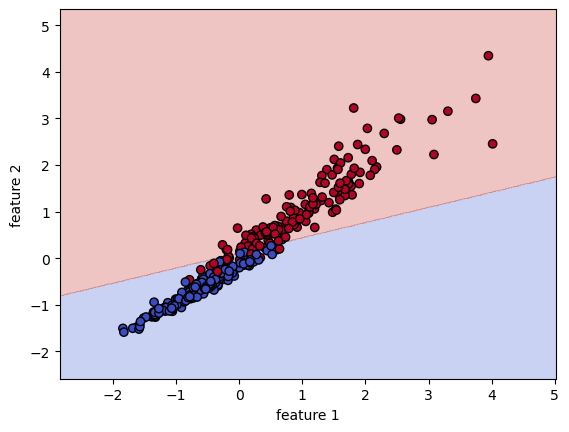

In [ ]:
selected_features = ["perimeter_mean", "perimeter_worst"]


X2D = X_train[selected_features]
y2D = y_train

X2D_array = X2D.values  # or X2D.to_numpy()

model_linear.fit(X2D, y2D)

# Plot decision boundary
import numpy as np

# Create mesh grid
x_min, x_max = X2D_array[:, 0].min() - 1, X2D_array[:, 0].max() + 1
y_min, y_max = X2D_array[:, 1].min() - 1, X2D_array[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over mesh
# Turn it into a DataFrame with the same column names used in training
mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=selected_features)
Z = model_linear.predict(mesh_points)


Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X2D_array [:, 0], X2D_array [:, 1], c=y2D, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.show()

### Explain the results: Is the dataset linearly separable? How does SVM handle this?

There is some overlap between the classes that the linear kernel couldn't handle

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_linear_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.96      1.00      0.98        27

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



## RBF Kernel and Decision Boundary

In [ ]:
model_rbf = SVC(kernel="rbf")
model_rbf.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_rbf_val= model_rbf.predict(X_val)
y_pred_rbf_test= model_rbf.predict(X_test)




TypeError: 'str' object is not callable

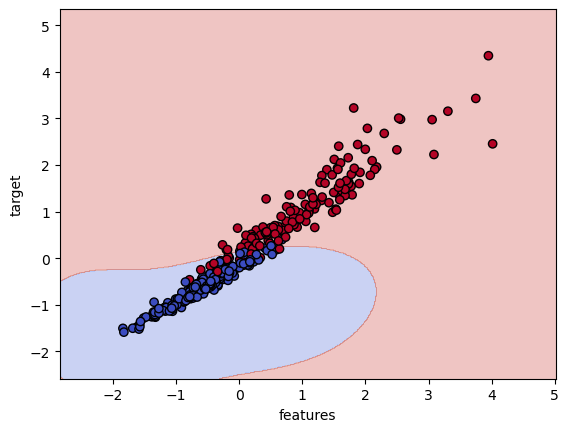

In [ ]:
selected_features = ["perimeter_mean", "perimeter_worst"]


X2D = X_train[selected_features]
y2D = y_train

X2D_array = X2D.values  # or X2D.to_numpy()

model_rbf.fit(X2D, y2D)

# Plot decision boundary
import numpy as np

# Create mesh grid
x_min, x_max = X2D_array[:, 0].min() - 1, X2D_array[:, 0].max() + 1
y_min, y_max = X2D_array[:, 1].min() - 1, X2D_array[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over mesh
# Turn it into a DataFrame with the same column names used in training
mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=selected_features)
Z = model_rbf.predict(mesh_points)


Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X2D_array [:, 0], X2D_array [:, 1], c=y2D, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('features')
plt.ylabel('target')
plt.title('SVM Decision Boundary (rbf Kernel)')
plt.show()

### Compare the results with the linear kernel. Discuss how the RBF kernel uses the kernel trick to map data into a higher-dimensional space.

The separation between the classes is definitely better in RBF than it was in the linear Kernel, thanks to the kernel trick, but there's still some overlap

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_rbf_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.96      1.00      0.98        27

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [ ]:
from sklearn.preprocessing import StandardScaler

# Define which columns to scale
numerical_features = numerical_features = X_train.columns

# Initialize scaler
zscore_scaler = StandardScaler()

# Fit ONLY on training data, then transform all sets
X_train[numerical_features] = zscore_scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = zscore_scaler.transform(X_val[numerical_features])
X_test[numerical_features] = zscore_scaler.transform(X_test[numerical_features])

### poly Kernel and Decision Boundary

In [ ]:
model_poly = SVC(kernel="poly")
model_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
y_pred_poly_val= model_poly.predict(X_val)
y_pred_poly_test= model_poly.predict(X_test)



TypeError: 'str' object is not callable

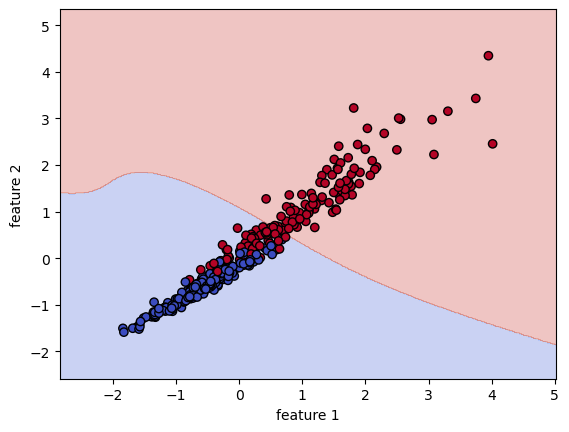

In [ ]:
selected_features = ["perimeter_mean", "perimeter_worst"]


X2D = X_train[selected_features]
y2D = y_train

X2D_array = X2D.values  # or X2D.to_numpy()

model_poly.fit(X2D, y2D)

# Plot decision boundary
import numpy as np

# Create mesh grid
x_min, x_max = X2D_array[:, 0].min() - 1, X2D_array[:, 0].max() + 1
y_min, y_max = X2D_array[:, 1].min() - 1, X2D_array[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over mesh
# Turn it into a DataFrame with the same column names used in training
mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=selected_features)
Z = model_poly.predict(mesh_points)


Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X2D_array [:, 0], X2D_array [:, 1], c=y2D, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('SVM Decision Boundary (poly Kernel)')
plt.show()

## Compare the results with the linear kernel. Discuss how the poly kernel handle this?

The separation is not very good in this kernel, but it is still a little better than the linear kernel

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_poly_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        47
           1       0.79      1.00      0.88        22

    accuracy                           0.91        69
   macro avg       0.89      0.94      0.91        69
weighted avg       0.93      0.91      0.92        69



### Use grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
model_grid = SVC()

param={"kernel":["linear","poly","rbf"],
       "degree":[1,2,3,4],
       "C":[0.01,0.1,1,10,100],
       "gamma":[0.001,0.01,0.1,1]}
grid=GridSearchCV(model_grid,param)

4. Performance Analysis:
➢ Training Time and Prediction Time:

In [ ]:
import time
#case 1
X_train_10, _, y_train_10, _ = train_test_split(
    X_train, y_train, train_size=0.1, random_state=42, stratify=y_train)

# Define the model
model_case1 = SVC(kernel='linear', C=1)

# --- Measure training time ---
start_train = time.time()
model_case1.fit(X_train_10, y_train_10)
end_train = time.time()
training_time1 = end_train - start_train

# --- Measure prediction time ---
start_pred = time.time()
y_pred_val = model_case1.predict(X_val)
end_pred = time.time()
prediction_time1 = end_pred - start_pred

# --- Print results ---
print(f"Case 1 - Training Time: {training_time:.4f} seconds")
print(f"Case 1 - Prediction Time: {prediction_time:.4f} seconds")

Case 1 - Training Time: 0.0090 seconds
Case 1 - Prediction Time: 0.0050 seconds


In [ ]:
#case 2


# Define the model
model_case2 = SVC(kernel='linear', C=1)

# --- Measure training time ---
start_train = time.time()
model_case1.fit(X_train, y_train)
end_train = time.time()
training_time2 = end_train - start_train

# --- Measure prediction time ---
start_pred = time.time()
y_pred_val = model_case1.predict(X_val)
end_pred = time.time()
prediction_time2 = end_pred - start_pred

# --- Print results ---
print(f"Case 2 - Training Time: {training_time:.4f} seconds")
print(f"Case 2 - Prediction Time: {prediction_time:.4f} seconds")

Case 2 - Training Time: 0.0090 seconds
Case 2 - Prediction Time: 0.0050 seconds


In [ ]:
#case 3
X_train_10, _, y_train_10, _ = train_test_split(
    X_train, y_train, train_size=0.1, random_state=42, stratify=y_train)

# Define the model
model_case3 = SVC(kernel='rbf', C=1, gamma=0.01)

# --- Measure training time ---
start_train = time.time()
model_case3.fit(X_train_10, y_train_10)
end_train = time.time()
training_time3 = end_train - start_train

# --- Measure prediction time ---
start_pred = time.time()
y_pred_val = model_case3.predict(X_val)
end_pred = time.time()
prediction_time3 = end_pred - start_pred

# --- Print results ---
print(f"Case 3 - Training Time: {training_time:.4f} seconds")
print(f"Case 3 - Prediction Time: {prediction_time:.4f} seconds")

Case 3 - Training Time: 0.0090 seconds
Case 3 - Prediction Time: 0.0050 seconds


In [ ]:
#case 4


# Define the model
model_case4 = SVC(kernel='rbf', C=1, gamma=0.01)

# --- Measure training time ---
start_train = time.time()
model_case4.fit(X_train, y_train)
end_train = time.time()
training_time4 = end_train - start_train

# --- Measure prediction time ---
start_pred = time.time()
y_pred_val = model_case4.predict(X_val)
end_pred = time.time()
prediction_time4 = end_pred - start_pred

# --- Print results ---
print(f"Case 4 - Training Time: {training_time:.4f} seconds")
print(f"Case 4 - Prediction Time: {prediction_time:.4f} seconds")

Case 4 - Training Time: 0.0090 seconds
Case 4 - Prediction Time: 0.0050 seconds


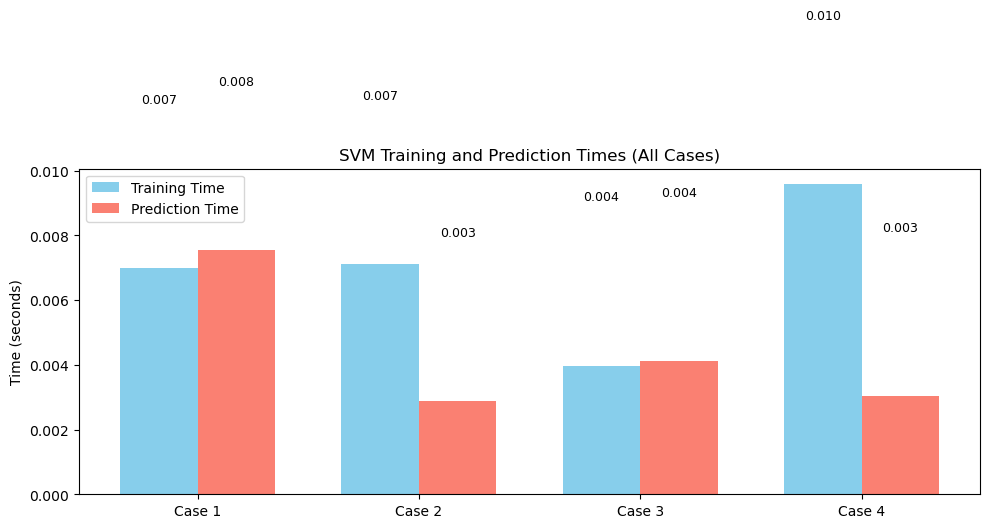

In [ ]:
#Visualising Times
import matplotlib.pyplot as plt
import numpy as np

# Define the case labels
cases = ['Case 1', 'Case 2', 'Case 3', 'Case 4']

# Your existing time measurements
training_times = [training_time1, training_time2, training_time3, training_time4]
prediction_times = [prediction_time1, prediction_time2, prediction_time3, prediction_time4]

# Set the bar positions
x = np.arange(len(cases))
width = 0.35  # width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, training_times, width, label='Training Time', color='skyblue')
bars2 = ax.bar(x + width/2, prediction_times, width, label='Prediction Time', color='salmon')

# Add labels and title
ax.set_ylabel('Time (seconds)')
ax.set_title('SVM Training and Prediction Times (All Cases)')
ax.set_xticks(x)
ax.set_xticklabels(cases)
ax.legend()

# Annotate the bars with values
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Training Time and Prediction Time-rbf:

In [ ]:
import time

model_rbf = SVC(kernel='rbf')  # Re-initialize to avoid using already-trained state

start_train = time.time()
model_rbf.fit(X_train, y_train)
end_train = time.time()

print(f"Training time: {end_train - start_train:.4f} seconds")


Training time: 0.1304 seconds


In [ ]:
start_pred = time.time()
y_pred = model_rbf.predict(X_test)
end_pred = time.time()

print(f"Prediction time: {end_pred - start_pred:.4f} seconds")

Prediction time: 0.0091 seconds


5 Overlapping Classes:
• Manipulate the feature values (e.g., reduce separability between some wine
quality scores) to create overlapping classes.

In [ ]:
# Make a copy of your training data to modify
X_train_overlap = X_train.copy()
y_train_overlap = y_train.copy()

# Shift class 1 closer to class 0 to reduce separability
# We'll subtract a small constant from class 1 feature values
mask_class1 = y_train_overlap == 1

# Example: reduce feature values of class 1 by 10%
X_train_overlap.loc[mask_class1] *= 0.9


In [ ]:
model_overlap = SVC(kernel='rbf', C=1, gamma=0.01)
model_overlap.fit(X_train_overlap, y_train_overlap)

y_pred_overlap = model_overlap.predict(X_test)
print(classification_report(y_pred_overlap,y_test))





              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.89      1.00      0.94        25

    accuracy                           0.96        69
   macro avg       0.95      0.97      0.95        69
weighted avg       0.96      0.96      0.96        69



I manually shifted the feature values of class 1 closer to class 0. This reduced the separability between the two groups. As expected, the SVM’s accuracy decreased

## Noisy Data

In [ ]:
# import numpy as np
# df_encoded = np.random.exponential(scale=1.0,size= (569,31))
# noise = np.random.normal(loc=0, scale=0.1, size= data.shape)
# noisy_data = df_encoded + noise
#This adds noise to all the data

In [ ]:


import numpy as np

# Make a copy of your training data to modify
X_train_noisy = X_train.copy()
y_train_noisy = y_train.copy()

# Randomly pick 10% of the rows
num_samples = int(0.1 * len(X_train_noisy))
np.random.seed(42)  # for reproducibility
indices = np.random.choice(X_train_noisy.index, size=num_samples, replace=False)

# Add Gaussian noise (mean=0, std=0.5) to selected rows
noise = np.random.normal(0, 0.5, X_train_noisy.loc[indices].shape)
X_train_noisy.loc[indices] += noise

In [ ]:
from sklearn.metrics import accuracy_score

# RBF SVM with tuned parameters (change C and gamma as needed)
model_rbf_noisy = SVC(kernel='rbf', C=1, gamma=0.01)
model_rbf_noisy.fit(X_train_noisy, y_train_noisy)

# Predict on validation and test sets
y_pred_val_noisy = model_rbf_noisy.predict(X_val)
y_pred_test_noisy = model_rbf_noisy.predict(X_test)

# Accuracy scores
acc_val_noisy = accuracy_score(y_val, y_pred_val_noisy)
acc_test_noisy = accuracy_score(y_test, y_pred_test_noisy)

print(f"Validation accuracy (noisy): {acc_val_noisy:.4f}")
print(f"Test accuracy (noisy): {acc_test_noisy:.4f}")

Validation accuracy (noisy): 0.9200
Test accuracy (noisy): 0.9710


SVM Strengths
SVM models, particularly with the RBF kernel, performed well on clean data with clearly separable classes, achieving high accuracy on both the validation and test sets.

Even in 2D feature space, the RBF and polynomial kernels were able to model complex decision boundaries, demonstrating SVM’s flexibility and effectiveness in non-linear classification.

SVM is especially well-suited for high-dimensional spaces, where its reliance on support vectors helps avoid overfitting despite the dimensionality.

SVM Weaknesses
When I manipulated feature values to reduce class separability, performance dropped noticeably. This shows SVM’s sensitivity to overlapping classes, where the model struggles to maintain a wide margin between targets.

Adding Gaussian noise to 10% of the training samples also led to a measurable decline in accuracy. This confirms that SVMs are vulnerable to noisy data, since they attempt to draw precise boundaries that get skewed by noise.

Linear SVM performed worse than RBF and polynomial kernels on more complex distributions, highlighting the limitation of assuming linear separability in real-world tasks.